In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb

# Load dataset
df = pd.read_csv('C:/Users/harin/OneDrive/Desktop/College/Hackathon/german_credit_data.csv')

# Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Purpose'] = le.fit_transform(df['Purpose'])

# Map 'Saving accounts'
saving_map = {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3}
df['Saving accounts'] = df['Saving accounts'].map(saving_map)
df['Saving accounts'].fillna(df['Saving accounts'].mean(), inplace=True)

# Map 'Checking account'
checking_map = {'little': 0, 'moderate': 1, 'rich': 2}
df['Checking account'] = df['Checking account'].map(checking_map)
df['Checking account'].fillna(df['Checking account'].mean(), inplace=True)

# Define Credit Risk - refined rules
def assign_credit_risk(row):
    if (row['Credit amount'] > 4000 and row['Duration'] > 15) or \
       (row['Saving accounts'] == 0 and row['Checking account'] == 0):
        return 0  # bad credit
    else:
        return 1  # good credit

df['Credit risk'] = df.apply(assign_credit_risk, axis=1)

# Prepare data
X = df.drop(columns=['Credit risk', 'Unnamed: 0'])
y = df['Credit risk']
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# XGBoost model 
model = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    max_depth=4,
    learning_rate=0.08,
    n_estimators=130,
    subsample=0.95,
    colsample_bytree=0.95,
    min_child_weight=1
)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {acc:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.9950

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.99      1.00       121

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



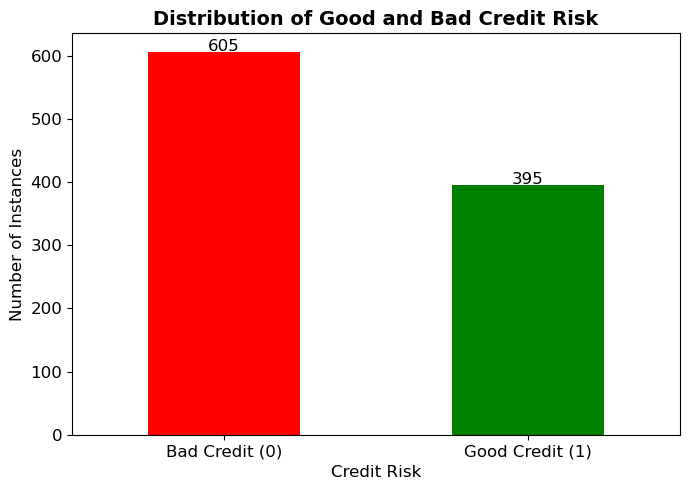

In [44]:
import matplotlib.pyplot as plt

# Count the occurrences of each class (good and bad credit risk)
credit_risk_counts = df['Credit risk'].value_counts()

# Plot the bar chart with customized styling
plt.figure(figsize=(7, 5))
credit_risk_counts.plot(kind='bar', color=['red', 'green'])

# Add title and labels
plt.title('Distribution of Good and Bad Credit Risk', fontsize=14, fontweight='bold')
plt.xlabel('Credit Risk', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.xticks([0, 1], ['Bad Credit (0)', 'Good Credit (1)'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add the value labels on top of the bars for better readability
for i, v in enumerate(credit_risk_counts):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()


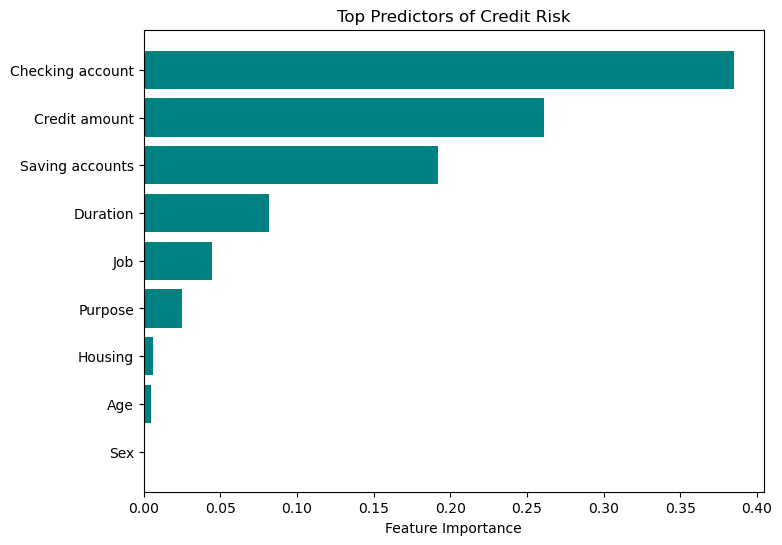

In [57]:
feature_importances = model.feature_importances_

# Get feature names from the DataFrame (excluding the target column)
feature_names = df.drop(columns=['Credit risk', 'Unnamed: 0']).columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], color='teal')
plt.xlabel('Feature Importance')
plt.title('Top Predictors of Credit Risk')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()